# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [133]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ChrisKwit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [134]:
# Read your api key environment variable

load_dotenv('../../../../Fintech.env')

True

In [135]:
# Create a newsapi client
from newsapi import NewsApiClient

news_api = NewsApiClient(os.getenv('news_api'))
type(news_api)

newsapi.newsapi_client.NewsApiClient

In [136]:
# Fetch the Bitcoin news articles

btc_news = news_api.get_everything(
    q = 'bitcoin',
    language = 'en'
)

btc_news['totalResults']

7257

In [137]:
# Fetch the Ethereum news articles

eth_news = news_api.get_everything(
    q = 'etherium',
    language = 'en'
)

eth_news['totalResults']

38

In [138]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(article, content):
    sentiments = []

    for article in article['articles']:
        try:
            text = article['content']
            date = article['publishedAt'][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment['compound']
            pos = sentiment['pos']
            neu = sentiment['neu']
            neg = sentiment['neg']
            
            sentiments.append({
                'Compound' : compound,
                'Negative' : neg,
                'Neutral' : neu,
                'Positive' : pos,
                'Text':text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_score_df = get_sentiment(btc_news, 'content')
btc_score_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.4019,0.078,0.922,0.000,"Image source, AFP via Getty Images\r\nImage ca..."
1,0.0000,0.000,1.000,0.000,The plant opening northeast of Niagara Falls t...
2,0.5106,0.000,0.901,0.099,"Earlier this year, Nothing released a pair of ..."
3,0.0000,0.000,1.000,0.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -..."
4,0.5859,0.000,0.858,0.142,Dec 23 (Reuters) - The U.S. Securities and Exc...


In [139]:
# Create the Ethereum sentiment scores DataFrame

eth_score_df = get_sentiment(eth_news, 'content')
eth_score_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.4717,0.081,0.919,0.000,The ConstitutionDAO group did not win its bid ...
1,0.3612,0.000,0.912,0.088,Blockchain is the digital record-keeping techn...
2,0.0000,0.000,1.000,0.000,Ubisoft has made itself the first major compan...
3,0.0000,0.000,1.000,0.000,While bitcoin and other cryptos were trading w...
4,-0.2732,0.054,0.946,0.000,The Bored Ape will now be decked out in stripe...


In [140]:
# Describe the Bitcoin Sentiment

btc_score_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.086085,0.020700,0.934500,0.044750
std,0.327388,0.032892,0.065407,0.062301
min,-0.401900,0.000000,0.791000,0.000000
25%,-0.006450,0.000000,0.891000,0.000000
50%,0.000000,0.000000,0.930500,0.000000
75%,0.471750,0.056750,1.000000,0.102250
max,0.585900,0.080000,1.000000,0.158000


In [141]:
# Describe the Ethereum Sentiment

eth_score_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.098645,0.026950,0.926900,0.046200
std,0.370162,0.041658,0.075739,0.063316
min,-0.599400,0.000000,0.708000,0.000000
25%,-0.025675,0.000000,0.890500,0.000000
50%,0.000000,0.000000,0.933000,0.000000
75%,0.396450,0.050250,1.000000,0.102250
max,0.658800,0.129000,1.000000,0.189000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium has the highest mean positive at 0.046200

Q: Which coin had the highest compound score?

A: Etherium has the highest compound score at 0.658800

Q. Which coin had the highest positive score?

A: Etherium has the highest positive score at 0.189000

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [142]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [143]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [144]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    
    output = [word.lower() for word in words if not word.lower() in sw]

    return output

In [145]:
# Create a new tokens column for Bitcoin
btc_score_df['Tokens'] = btc_score_df['Text'].apply(tokenizer)
btc_score_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.4019,0.078,0.922,0.000,"Image source, AFP via Getty Images\r\nImage ca...","[image, source, afp, via, getty, imagesimage, ..."
1,0.0000,0.000,1.000,0.000,The plant opening northeast of Niagara Falls t...,"[plant, opening, northeast, niagara, falls, mo..."
2,0.5106,0.000,0.901,0.099,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."
3,0.0000,0.000,1.000,0.000,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...","[mizata, el, salvadorlondon, nov, reuters, el,..."
4,0.5859,0.000,0.858,0.142,Dec 23 (Reuters) - The U.S. Securities and Exc...,"[dec, reuters, us, securities, exchange, commi..."


In [146]:
# Create a new tokens column for Ethereum
eth_score_df['Tokens'] = eth_score_df['Text'].apply(tokenizer)
eth_score_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.4717,0.081,0.919,0.000,The ConstitutionDAO group did not win its bid ...,"[constitutiondao, group, win, bid, buy, copy, ..."
1,0.3612,0.000,0.912,0.088,Blockchain is the digital record-keeping techn...,"[blockchain, digital, recordkeeping, technolog..."
2,0.0000,0.000,1.000,0.000,Ubisoft has made itself the first major compan...,"[ubisoft, made, first, major, company, gaming,..."
3,0.0000,0.000,1.000,0.000,While bitcoin and other cryptos were trading w...,"[bitcoin, cryptos, trading, marginal, fall, ar..."
4,-0.2732,0.054,0.946,0.000,The Bored Ape will now be decked out in stripe...,"[bored, ape, decked, stripes, adidas, partners..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [147]:
from collections import Counter
from nltk import ngrams

In [148]:
# Generate the Bitcoin N-grams where N=2
def get_tokens(df):
    output = []
    for token in df['Tokens']:
        output.extend(token)
    return output

def bigram_counter(tokens, N=2): 
    bigrams = dict(Counter(ngrams(tokens, n=N)))
    return bigrams 

btc_tokens = get_tokens(btc_score_df)
btc_bigrams = bigram_counter(btc_tokens, 2)
btc_bigrams

{('image', 'source'): 1,
 ('source', 'afp'): 1,
 ('afp', 'via'): 1,
 ('via', 'getty'): 1,
 ('getty', 'imagesimage'): 1,
 ('imagesimage', 'caption'): 1,
 ('caption', 'modi'): 1,
 ('modi', 'million'): 1,
 ('million', 'twitter'): 1,
 ('twitter', 'followersindian'): 1,
 ('followersindian', 'prime'): 1,
 ('prime', 'minister'): 2,
 ('minister', 'narendra'): 2,
 ('narendra', 'modis'): 2,
 ('modis', 'twitter'): 2,
 ('twitter', 'account'): 2,
 ('account', 'hacked'): 1,
 ('hacked', 'message'): 1,
 ('message', 'saying'): 1,
 ('saying', 'india'): 1,
 ('india', 'ha'): 1,
 ('ha', 'chars'): 1,
 ('chars', 'plant'): 1,
 ('plant', 'opening'): 1,
 ('opening', 'northeast'): 1,
 ('northeast', 'niagara'): 1,
 ('niagara', 'falls'): 1,
 ('falls', 'month'): 1,
 ('month', 'somerset'): 1,
 ('somerset', 'ny'): 1,
 ('ny', 'part'): 1,
 ('part', 'million'): 1,
 ('million', 'project'): 1,
 ('project', 'terawulf'): 1,
 ('terawulf', 'bitcoin'): 1,
 ('bitcoin', 'mining'): 1,
 ('mining', 'company'): 1,
 ('company', 'proj

In [149]:
# Generate the Ethereum N-grams where N=2

eth_tokens = get_tokens(eth_score_df)
eth_bigrams = bigram_counter(eth_tokens, 2)
eth_bigrams

{('constitutiondao', 'group'): 1,
 ('group', 'win'): 1,
 ('win', 'bid'): 1,
 ('bid', 'buy'): 1,
 ('buy', 'copy'): 1,
 ('copy', 'us'): 1,
 ('us', 'constitution'): 1,
 ('constitution', 'however'): 1,
 ('however', 'amassing'): 1,
 ('amassing', 'million'): 1,
 ('million', 'usd'): 1,
 ('usd', 'etherium'): 1,
 ('etherium', 'cost'): 1,
 ('cost', 'million'): 1,
 ('million', 'transaction'): 1,
 ('transaction', 'fees'): 1,
 ('fees', 'assumedly'): 1,
 ('assumedly', 'cost'): 1,
 ('cost', 'chars'): 1,
 ('chars', 'blockchain'): 1,
 ('blockchain', 'digital'): 1,
 ('digital', 'recordkeeping'): 1,
 ('recordkeeping', 'technology'): 1,
 ('technology', 'behind'): 1,
 ('behind', 'cryptocurrency'): 1,
 ('cryptocurrency', 'networks'): 1,
 ('networks', 'like'): 1,
 ('like', 'bitcoin'): 1,
 ('bitcoin', 'etherium'): 1,
 ('etherium', 'become'): 1,
 ('become', 'potential'): 1,
 ('potential', 'gamechanger'): 1,
 ('gamechanger', 'financial'): 1,
 ('financial', 'services'): 1,
 ('services', 'industrial'): 1,
 ('indu

In [150]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [151]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = token_count(btc_tokens)
btc_top_10

[('chars', 19),
 ('bitcoin', 17),
 ('reuters', 7),
 ('worlds', 6),
 ('cryptocurrency', 6),
 ('posted', 5),
 ('twitter', 4),
 ('billion', 4),
 ('week', 4),
 ('ear', 3)]

In [152]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = token_count(eth_tokens)
eth_top_10

[('chars', 20),
 ('us', 4),
 ('first', 4),
 ('nft', 4),
 ('million', 3),
 ('etherium', 3),
 ('digital', 3),
 ('bitcoin', 3),
 ('services', 3),
 ('gaming', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

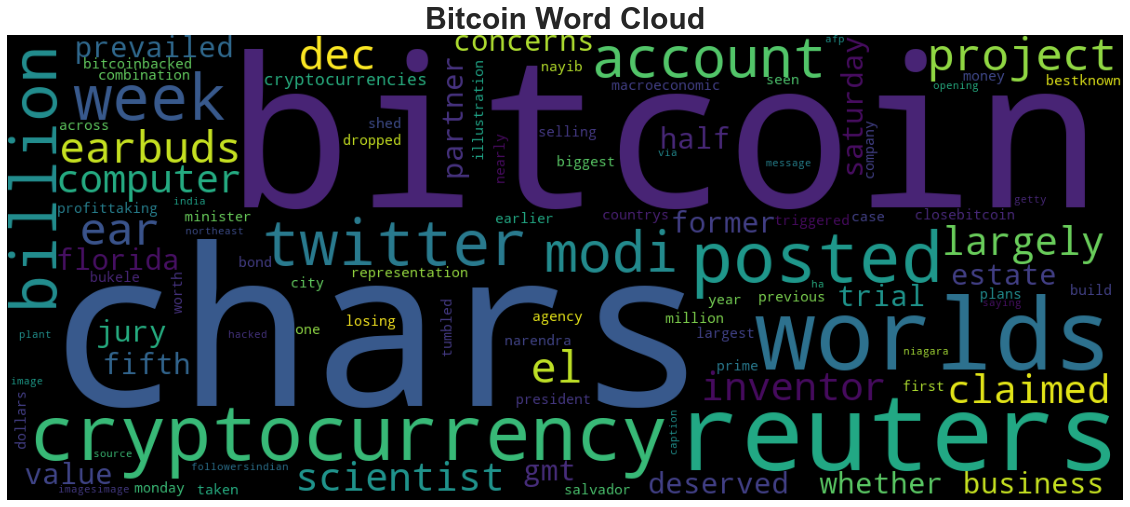

In [154]:
# Generate the Bitcoin word cloud
wc = WordCloud(
    collocations=False, 
    width=1200, 
    height=500, 
    max_words=100).generate(' '.join(btc_tokens))

plt.imshow(wc)
plt.axis('off')
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'});

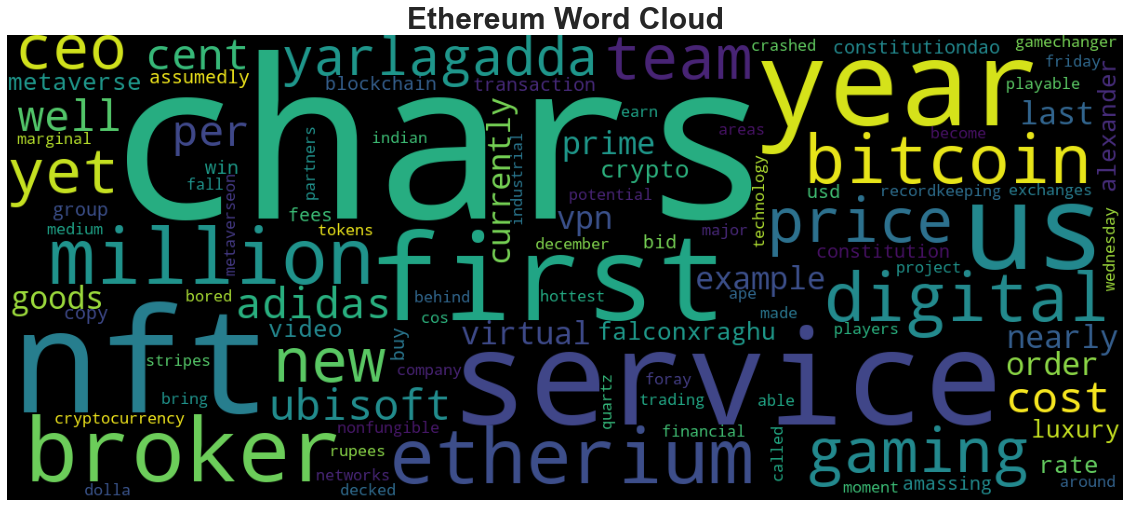

In [155]:
# Generate the Ethereum word cloud
wc = WordCloud(
    collocations=False, 
    width=1200, 
    height=500, 
    max_words=100).generate(' '.join(eth_tokens))

plt.imshow(wc)
plt.axis('off')
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'});

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [156]:
import spacy
from spacy import displacy

In [157]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [158]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [159]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_score_df['Text'])

In [160]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin Named Entity Recognition"

In [161]:
# Render the visualization
displacy.render(doc, style='ent')

In [162]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

AFP ORG
Getty Images ORG
Modi GPE
more than 70 million MONEY
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
Earlier this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
Dec 23 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
Twitter PRODUCT
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
+1087 CARDINAL
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationDec PERSON
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Reuters ORG
Monday DATE
Florida GPE
half CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
fifth ORDINAL
Saturday DA

---

### Ethereum NER

In [163]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_score_df['Text'])

In [164]:
# Run the NER processor on all of the text
doc = nlp(eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum Named Entity Recognition"

In [165]:
# Render the visualization
displacy.render(doc, style='ent')

In [166]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

ConstitutionDAO ORG
the US Constitution EVENT
$40 million MONEY
$1 million MONEY
Bitcoin and Etherium ORG
Ubisoft PERSON
first ORDINAL
Ubisoft Quartz PERSON
NFT ORG
Indian NORP
10 per cent MONEY
Wednesday DATE
US GPE
The Bored Ape WORK_OF_ART
NFT ORG
first ORDINAL
Friday, December 17 DATE
today DATE
9 am TIME
ISTANBUL ORG
Machine Hallucinations - Nature PERSON
AI Data Sculpture ORG
Turkish NORP
Refik Anadol PERSON
roughly $US2.4 MONEY
3 MONEY
Last year DATE
Dave PERSON
Brit Morin PERSON
James Higa PERSON
Apple ORG
nearly a dozen years DATE
Nate Bosshard PERSON
AP ORG
Al Kelly PERSON
91-year-old DATE
PlayUp ORG
Australia GPE
New Jersey GPE
Colorado GPE
U.S. GPE
Laila Mintas ORG
VPN ORG
Raghu Yarlagadda - FalconX PERSON
Raghu Yarlagadda - FalconX PERSON
Raghu Yarlagadda PERSON
FalconX GPE
$3.5 billion MONEY
this week DATE
Tal Alexander PERSON
The Alexander Team ORG
Douglas Elliman PERSON
first ORDINAL
iStock ORG
BFA ORG
first ORDINAL
27-inch QUANTITY
240Hz CARDINAL
WQHD ORG
IPS ORG
LCD O

---